# Basic proof of concept for psy-vtk and ICON files

This notebook just tests the visualization of geo-referenced data using psy-vtk for ICON (see [the psy-maps example for ICON files](https://psyplot.readthedocs.io/projects/psy-maps/en/latest/examples/example_ugrid.html#visualizing-scalar-and-vector-icon-data) if you want to see how it looks with matplotlib)

In [1]:
import psyplot.project as psy
import psy_vtk.plotters as pvtk

In [2]:
ds = psy.open_dataset('icon_grid_demo.nc')
ds

<xarray.Dataset>
Dimensions:    (edge: 480, lev: 4, ncells: 5120, no: 4, time: 5, vertices: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-31T18:00:00 ... 1979-05-31T18:00:00
    clon       (ncells) float64 ...
    clon_bnds  (ncells, vertices) float64 ...
    clat       (ncells) float64 ...
    clat_bnds  (ncells, vertices) float64 ...
    elon       (edge) float32 ...
    elon_bnds  (edge, no) float32 ...
    elat       (edge) float32 ...
    elat_bnds  (edge, no) float32 ...
  * lev        (lev) float64 1e+05 8.5e+04 5e+04 2e+04
Dimensions without coordinates: edge, ncells, no, vertices
Data variables:
    t2m        (time, lev, ncells) float32 ...
    u          (time, lev, ncells) float32 ...
    v          (time, lev, ncells) float32 ...
    t2m_edge   (time, lev, edge) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.1 (http://mpimet...
    Conventions:          CF-1.4
    history:              Thu Aug 30 21:54:23 2018: cdo delna

In [3]:
data = ds.psy.t2m.psy[0, 0]

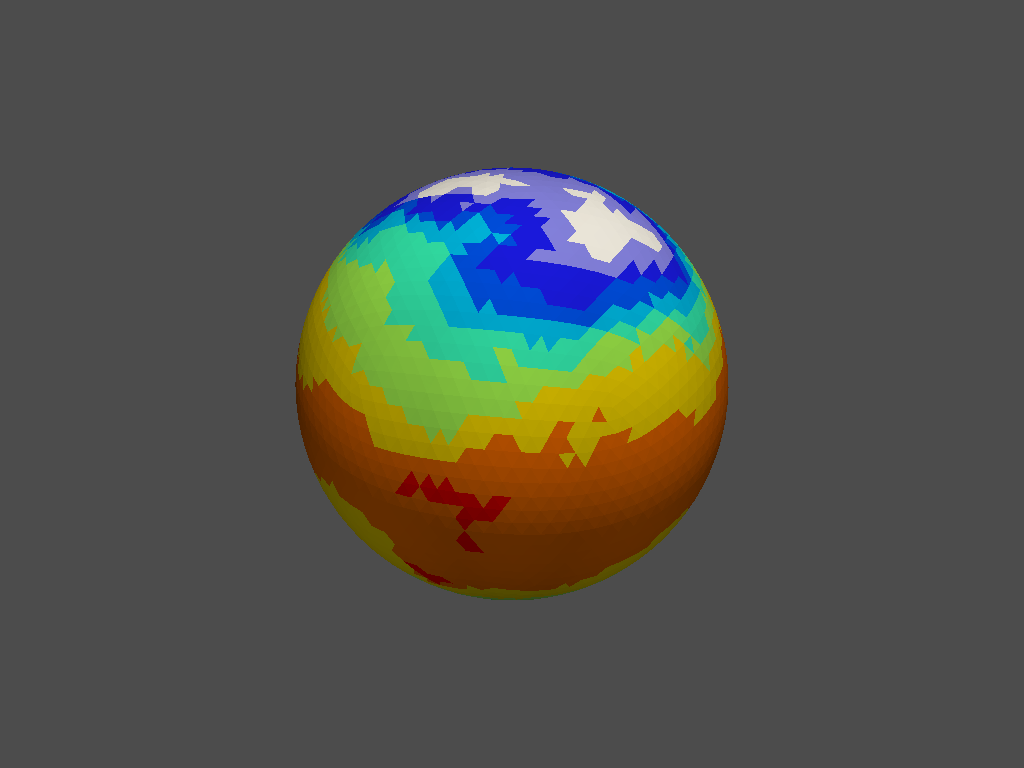

In [4]:
globe_plot = pvtk.GlobePlotter(data)
disp = globe_plot.ax.show()
disp

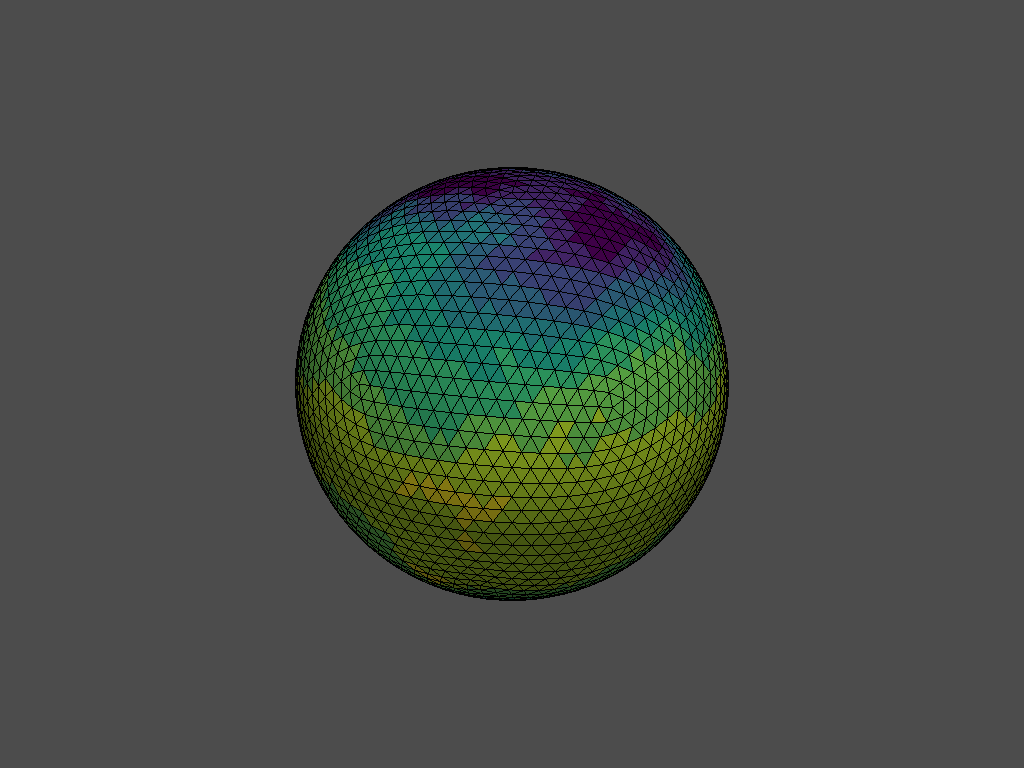

In [5]:
globe_plot.update(datagrid=True, cmap='viridis')
disp

Now let's try the edge grid of ICON

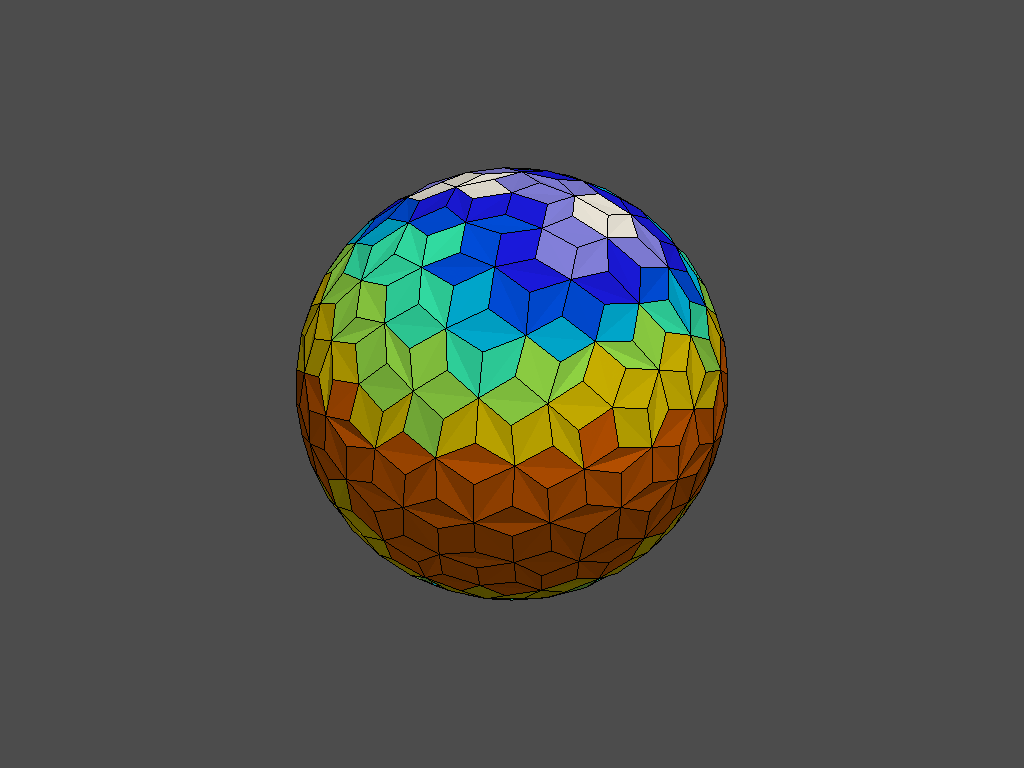

In [6]:
edge_data = ds.psy.t2m_edge.psy[0, 0]
edge_plotter = pvtk.GlobePlotter(edge_data, datagrid=True)
edge_plotter.ax.show()